# Exploratory Data Analysis of Crime in Los Angeles

This notebook presents an exploratory data analysis of crime incidents in Los Angeles using a public dataset.
The analysis focuses on victim demographics, temporal crime patterns, and night crime distribution.


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


In [23]:
crimes = pd.read_csv(
    "../data/crimes.csv",
    dtype={"TIME OCC": str}
)

crimes.head()




,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## Data Overview

We begin by inspecting the structure and basic characteristics of the dataset.


In [24]:
crimes.shape


(185715, 12)

In [25]:
crimes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  object
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(2), object(10)
memory usage: 17.0+ MB


## Data Cleaning

Basic cleaning steps were applied to ensure data quality for the analysis.


In [26]:
crimes = crimes.dropna(subset=["Vict Age", "TIME OCC", "AREA NAME"])
crimes = crimes[crimes["Vict Age"] > 0]


## Victim Age Distribution


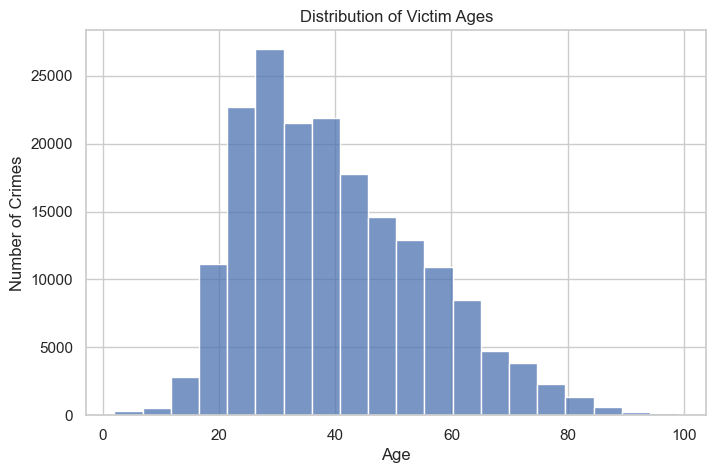

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(crimes["Vict Age"], bins=20)
plt.title("Distribution of Victim Ages")
plt.xlabel("Age")
plt.ylabel("Number of Crimes")
plt.show()


## Temporal Analysis of Crimes


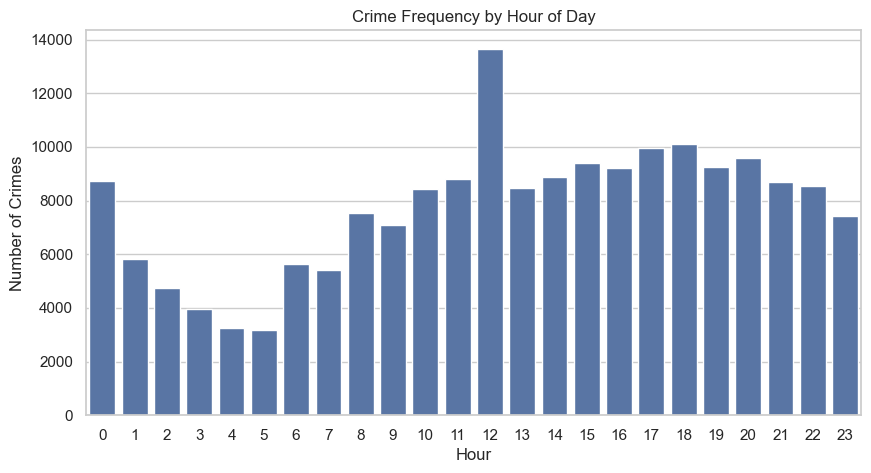

np.int64(12)

In [28]:
crimes["hour_occ"] = crimes["TIME OCC"].str[:2].astype(int)

plt.figure(figsize=(10,5))
sns.countplot(data=crimes, x="hour_occ")
plt.title("Crime Frequency by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.show()

peak_crime_hour = crimes["hour_occ"].value_counts().idxmax()
peak_crime_hour


## Night Crime Analysis


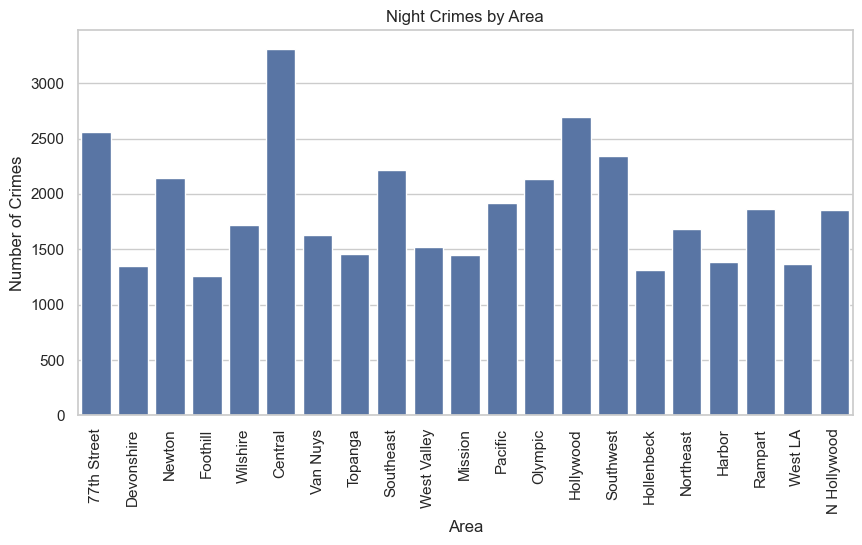

'Central'

In [29]:
night_crimes = crimes[
    (crimes["hour_occ"] >= 22) | (crimes["hour_occ"] <= 3)
]

plt.figure(figsize=(10,5))
sns.countplot(data=night_crimes, x="AREA NAME")
plt.xticks(rotation=90)
plt.title("Night Crimes by Area")
plt.xlabel("Area")
plt.ylabel("Number of Crimes")
plt.show()

peak_night_crime_location = night_crimes["AREA NAME"].value_counts().idxmax()
peak_night_crime_location


## Crimes by Victim Age Groups


In [30]:
labels = ["0-17","18-25","26-34","35-44","45-54","55-64","65+"]
bins = [0, 17, 25, 34, 44, 54, 64, np.inf]

victim_ages = pd.cut(
    crimes["Vict Age"],
    bins=bins,
    labels=labels
).value_counts()

victim_ages


Vict Age
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64

## Conclusions

- Crime frequency peaks around midday.
- Night crimes are concentrated in specific areas, particularly Central LA.
- Most crimes involve victims between 26 and 44 years old.
